In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd/content/drive/MyDrive/a3

/content/drive/MyDrive/a3


In [10]:
pwd

'/content/drive/MyDrive/a3'

In [11]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [5]:
import cv2

In [90]:
img = cv2.imread("/content/drive/MyDrive/a3/flowers/sunflower/1008566138_6927679c8a.jpg")
img

array([[[ 42,  49,  34],
        [ 39,  49,  33],
        [ 39,  51,  33],
        ...,
        [ 13,  42,  16],
        [ 12,  41,  15],
        [ 12,  41,  15]],

       [[ 40,  48,  31],
        [ 37,  47,  30],
        [ 37,  49,  31],
        ...,
        [ 17,  43,  25],
        [ 16,  42,  24],
        [ 15,  41,  23]],

       [[ 38,  46,  29],
        [ 35,  45,  28],
        [ 36,  48,  28],
        ...,
        [ 19,  48,  25],
        [ 18,  48,  23],
        [ 17,  47,  22]],

       ...,

       [[ 31, 140,  91],
        [ 91, 142,  98],
        [ 82, 123,  95],
        ...,
        [ 49,  96,  47],
        [ 48,  95,  46],
        [ 48,  94,  47]],

       [[ 19, 141,  87],
        [ 52, 141,  98],
        [ 80, 123,  90],
        ...,
        [ 48,  97,  43],
        [ 50,  96,  44],
        [ 49,  92,  49]],

       [[ 19, 141,  87],
        [ 56, 145, 102],
        [ 90, 133, 100],
        ...,
        [ 48,  96,  44],
        [ 50,  94,  47],
        [ 47,  91,  50]]

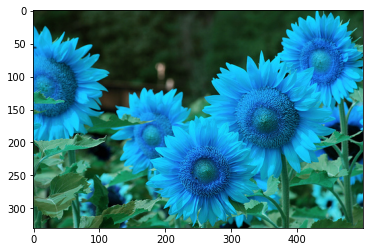

In [91]:
import matplotlib.pyplot as plt
plt.imshow(img)

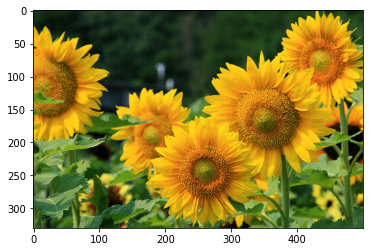

In [92]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

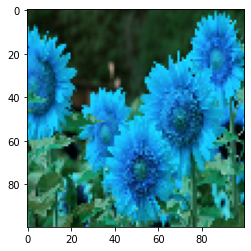

In [93]:
plt.imshow(cv2.resize(img,(100,100)))

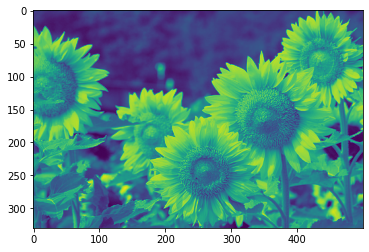

In [94]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

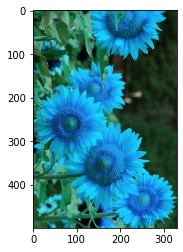

In [95]:
plt.imshow(cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE))

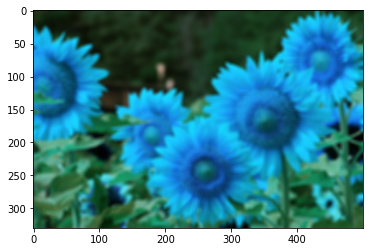

In [97]:
he = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(he)

In [98]:
rs = cv2.resize(img,(100,100))
print(img.shape)
print(rs.shape)

(330, 500, 3)
(100, 100, 3)


image augmentation

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [100]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/a3/flowers",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [101]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/a3/flowers",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [102]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Initializing CNN And Create Model

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten

Add layers

In [104]:
model = Sequential()

In [105]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [106]:
model.add(MaxPool2D(pool_size=(2,2)))

In [107]:
model.add(Flatten())

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Hidden layers

In [109]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

Output layers

In [110]:
model.add(Dense(5,activation="softmax"))

In [111]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['Accuracy'])

In [112]:
len(x_train)

180

In [121]:
model.fit(x_train, epochs=10, steps_per_epoch=len(x_train))

Epoch 1/10
180/180 [==============================] - 29s 160ms/step - loss: 1.1650 - Accuracy: 0.5173
Epoch 2/10
180/180 [==============================] - 29s 160ms/step - loss: 1.0518 - Accuracy: 0.5858
Epoch 3/10
180/180 [==============================] - 29s 160ms/step - loss: 0.9692 - Accuracy: 0.6152
Epoch 4/10
180/180 [==============================] - 30s 165ms/step - loss: 0.9282 - Accuracy: 0.6461
Epoch 5/10
180/180 [==============================] - 29s 159ms/step - loss: 0.8885 - Accuracy: 0.6613
Epoch 6/10
180/180 [==============================] - 29s 159ms/step - loss: 0.8563 - Accuracy: 0.6627
Epoch 7/10
180/180 [==============================] - 28s 157ms/step - loss: 0.8232 - Accuracy: 0.6836
Epoch 8/10
180/180 [==============================] - 31s 171ms/step - loss: 0.7710 - Accuracy: 0.7030
Epoch 9/10
180/180 [==============================] - 28s 158ms/step - loss: 0.7539 - Accuracy: 0.7093
Epoch 10/10
180/180 [==============================] - 31s 172ms/step - l

In [122]:
model.save('Flowers_classification_model1.h5')

In [123]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [124]:
model=load_model('Flowers_classification_model1.h5')

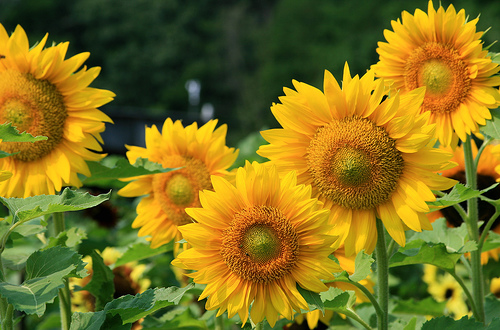

In [126]:
img = image.load_img(r"/content/drive/MyDrive/a3/flowers/sunflower/1008566138_6927679c8a.jpg")
img

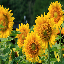

In [128]:
img = image.load_img(r"/content/drive/MyDrive/a3/flowers/sunflower/1008566138_6927679c8a.jpg",target_size=(64,64))
img

In [130]:
x = image.img_to_array(img)
x

array([[[ 30.,  50.,  38.],
        [ 29.,  50.,  35.],
        [ 22.,  42.,  30.],
        ...,
        [ 11.,  32.,  13.],
        [ 16.,  38.,  17.],
        [ 25.,  48.,  19.]],

       [[ 23.,  46.,  28.],
        [ 23.,  46.,  28.],
        [ 17.,  35.,  21.],
        ...,
        [ 23.,  50.,  19.],
        [ 28.,  58.,  24.],
        [ 29.,  61.,  20.]],

       [[ 24.,  49.,  28.],
        [ 19.,  45.,  20.],
        [ 11.,  32.,  15.],
        ...,
        [ 46.,  75.,  19.],
        [ 40.,  72.,  31.],
        [ 27.,  57.,  21.]],

       ...,

       [[ 88., 122.,  46.],
        [ 39.,  74.,  16.],
        [ 39.,  78.,  23.],
        ...,
        [ 49.,  79.,  25.],
        [ 61., 107.,  60.],
        [ 61., 114.,  72.]],

       [[ 73., 111.,  36.],
        [ 32.,  71.,   8.],
        [ 40.,  50.,  25.],
        ...,
        [ 45.,  85.,  33.],
        [ 74., 106.,  67.],
        [ 52., 103.,  47.]],

       [[ 88., 114.,  49.],
        [ 34.,  69.,  13.],
        [ 39.,  

In [135]:
x=np.expand_dims(x,axis=0)
x

array([[[[[ 30.,  50.,  38.],
          [ 29.,  50.,  35.],
          [ 22.,  42.,  30.],
          ...,
          [ 11.,  32.,  13.],
          [ 16.,  38.,  17.],
          [ 25.,  48.,  19.]],

         [[ 23.,  46.,  28.],
          [ 23.,  46.,  28.],
          [ 17.,  35.,  21.],
          ...,
          [ 23.,  50.,  19.],
          [ 28.,  58.,  24.],
          [ 29.,  61.,  20.]],

         [[ 24.,  49.,  28.],
          [ 19.,  45.,  20.],
          [ 11.,  32.,  15.],
          ...,
          [ 46.,  75.,  19.],
          [ 40.,  72.,  31.],
          [ 27.,  57.,  21.]],

         ...,

         [[ 88., 122.,  46.],
          [ 39.,  74.,  16.],
          [ 39.,  78.,  23.],
          ...,
          [ 49.,  79.,  25.],
          [ 61., 107.,  60.],
          [ 61., 114.,  72.]],

         [[ 73., 111.,  36.],
          [ 32.,  71.,   8.],
          [ 40.,  50.,  25.],
          ...,
          [ 45.,  85.,  33.],
          [ 74., 106.,  67.],
          [ 52., 103.,  47.]],



In [132]:
pred=model.predict(x)
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [133]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [134]:
index=['daisy','dandelion','rose','sunflower','tulip']
index[np.argmax(pred)]

'sunflower'